In [1]:
from lablib import *
import physplot
import pandas as pd
import numpy as np

## Measurements

### Preliminary:

Data was entered into a spreadsheet and saved as a CSV file. There is some processing that still needs to be done, as the values per coil count are not separated, and the angles were not entered in order. That processing will be done below...

In [14]:
data = pd.read_csv("data.csv")
display(data)

,Coil Count,Current (mA),Angle (deg),Current Error (mA),Diameter of Coil (cm),Diameter Error (cm),Angle Error (deg)
0,100,4.80,10,0.2,21.8,0.5,1
1,100,10.43,20,0.2,21.8,0.5,1
2,100,16.01,30,0.2,21.8,0.5,1
3,100,24.20,40,0.2,21.8,0.5,1
4,100,35.70,50,0.2,21.8,0.5,1
5,200,1.98,10,0.2,21.8,0.5,1
6,200,5.22,20,0.2,21.8,0.5,1
7,200,9.09,30,0.2,21.8,0.5,1
8,200,12.28,40,0.2,21.8,0.5,1
9,200,17.83,50,0.2,21.8,0.5,1


### 1) Write down your measurement of the diameter of the coil including the uncertainty.  (2 points)

We can see that the diameter of the coil was recorded as $21.80 \pm 0.50 \: cm$. Python code below extracts that value from the data.

In [12]:
display_result("Coil Diameter: ", data["Diameter of Coil (cm)"][0], data["Diameter Error (cm)"][0], "cm")

Coil Diameter:  $ 21.80 \pm 0.50 \: cm $

### 2) Submit the Github link of your plots of tan(ϴ) vs. I with the appropriate fit parameters.  (7 points)

Plotting code below, also includes the preprocessing code, which cleans up the data by splitting it per coil count and then sorting the data by angle so we can plot it.

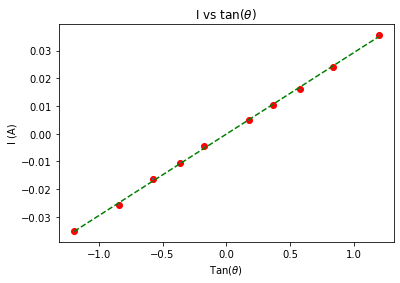

Slope =  0.029443546170661146   A
Error in slope =  8.734934292143138e-05   A
Goodness of fit =  98.45953596531946


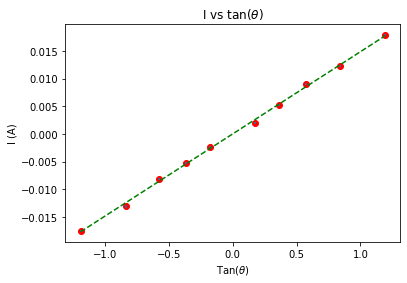

Slope =  0.014862149492891318   A
Error in slope =  8.734934292143138e-05   A
Goodness of fit =  38.45901922555081


In [13]:
def get_for(coil_match, coils, tans, i_s, i_errors):
    # Grabs values for a single coil count and sorts the results by the tangent of the angles.
    # These values can be directly passed to ploting functions...
    coils, tans, i_s, i_errors = [np.array(arr) for arr in [coils, tans, i_s, i_errors]]
    idx = coils == coil_match
    idx_sorted = np.argsort(tans[idx])
    return tans[idx][idx_sorted], i_s[idx][idx_sorted], i_errors[idx][idx_sorted]

# Grab Data
coil_count = data["Coil Count"]

tan_vals = np.tan(np.deg2rad(data["Angle (deg)"]))
i_vals = data["Current (mA)"] / 1000  # mA -> A
i_error = data["Current Error (mA)"] / 1000  # mA -> A

# Plot our data, and get slopes.
m100, dm100, N100 = physplot.plotfit(*get_for(100, coil_count, tan_vals, i_vals, i_error), r"I vs tan($\theta$)", r"Tan($\theta$)", "I (A)", r"A")

m200, dm200, N200 = physplot.plotfit(*get_for(200, coil_count, tan_vals, i_vals, i_error), r"I vs tan($\theta$)", r"Tan($\theta$)", "I (A)", r"A")

### 3) What is the value for the horizontal component of Earth’s magnetic field that you found for 100 turns of wire using the slope of your curve, including the uncertainty?  Show you work.  (6 points)

Python code below uses slopes extracted from the plots above to compute the horizontal component of Earth's magnetic field for both the 100 and 200 turns of wire. For 100 turns, I got a horizontal magnetic component value of $169724 \pm 3925 \: nT$. Full results can be seen below.

In [17]:
mu_0 = 4 * np.pi * 1E-7

N100 = 100
N200 = 200

r = data["Diameter of Coil (cm)"][0] / 2000
r_err = data["Diameter Error (cm)"][0] / 2000

markdown("#### Experimental Values")

# Compute magnetic field of earth for 100 coils...
B100 = (mu_0 * N100 * m100) / (2 * r) 
B100_err = rule_4(B100, (m100, dm100, 1), (r, r_err, -1))
display_result("Horizantal Component of Earth's Field from 100 Coils: ", B100 * 1e9, B100_err * 1e9, r"nT", 0)

# Compute magnetic field of earth for 200 coils...
B200 = (mu_0 * N200 * m200) / (2 * r)
B200_err = rule_4(B200, (m200, dm200, 1), (r, r_err, -1))
display_result("Horizantal Component of Earth's Field from 200 Coils: ", B200 * 1e9, B200_err * 1e9, r"nT", 0)

markdown("#### Theoretical Values")
# Theoretical Value, directly from https://www.ngdc.noaa.gov/geomag/calculators/magcalc.shtml#igrfwmm
# Already in nano Tesla...
B_t = 18432.5
B_t_err = 128
display_result("Horizantal Component of Earth's Field, Theoretical: ", B_t, B_t_err, "nT", 0)

#### Experimental Values

Horizantal Component of Earth's Field from 100 Coils:  $ 169724 \pm 3925 \: nT $

Horizantal Component of Earth's Field from 200 Coils:  $ 171342 \pm 4057 \: nT $

#### Theoretical Values

Horizantal Component of Earth's Field, Theoretical:  $ 18432 \pm 128 \: nT $

##  Results and Analysis

###  4) What is the theoretical value of the horizontal component of Earth’s magnetic field and the two values you found using your plots including the uncertainty?  Do your experimental values agree with the accepted value?  Discuss the results for all two number of turns of wire.  Justify your answers.  (7 points)

See the output of the code cell for question 3 to see the experimental and theoretical results calculated for the earth's gravity. My results do not agree with the theoretical value, as the python code below confirms. This can also easily be seen by looking at the values, as their uncertainty ranges don't overlap. Although my results are not accurate, they are precise, as the two values for 100 and 200 coils agree with each other, and their uncertainty ranges overlap.

In [18]:
# Iterating all pairs to see if they agree...
all_res = [("100 Coil", B100, B100_err), ("200 Coil", B200, B200_err), ("Theoretical", B_t, B_t_err)]

markdown("#### Do Results Agree?")
for i in range(len(all_res)):
    for j in range(i + 1, len(all_res)):
        comp = values_agree(*all_res[i][1:3], *all_res[j][1:3])
        markdown(f"Do {all_res[i][0]} and {all_res[j][0]} results agree? {'Yes' if(comp) else 'No'}")

#### Do Results Agree?

Do 100 Coil and 200 Coil results agree? Yes

Do 100 Coil and Theoretical results agree? No

Do 200 Coil and Theoretical results agree? No

##  Concepts and Analysis

### 5) Briefly explain why your slope was highest for N = 200 loops and lowest for N = 100.  (3 points)

My slope was not highest for 200 loops, but rather the lowest. This may just be due to the way I plotted the results. ($I$ on the y axis instead of $\tan(\theta)$). We can see, by rearranging the equation for computing the earth's magnetic field, that $I$ and $N$ are inversely proportional:

$$
B_{E,hor} = \frac{\mu_0 N I}{2r \tan(\theta)} \implies N = \frac{1}{I} \cdot \frac{2rB_{E,hor}\tan(\theta)}{\mu_0} \implies N \propto \frac{1}{I}
$$

Therefore, if we increase the number of turns and everything else remains constant except for the current, the current must decrease by the same factor that the number of turns increases by. This is why when N went from 100 to 200, or doubled, the current, and slope of the plot, halved.